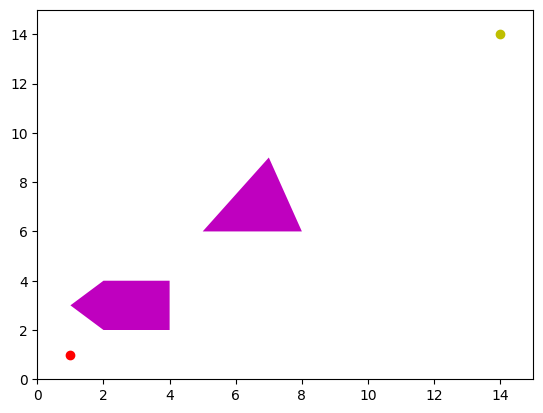

In [56]:
""" The goal of this code is to take a collection of polygons
    with integer coordinates and returns a path that traverses 
    the obstacles """

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

polygons = [[(1,1)],
            [(2,2), (4,2), (4,4), (2,4), (1,3)],
            [(5,6), (8,6), (7,9)],
            [(14,14)]]

start = polygons[0][0]
end = polygons[-1][0]

polygon_plot = []

for p in polygons:
    polygon_plot.append(Polygon(p, facecolor = 'm'))


fig,ax = plt.subplots()

# begin
ax.plot(start[0], start[1],'-ro')
# end
ax.plot(end[0], end[1],'-yo')

for p in polygon_plot:
    ax.add_patch(p)

ax.set_xlim([0,15])
ax.set_ylim([0,15])
plt.show()


In [133]:
def line_intersection(a, b, c, d):
    denom = ((a[0] - b[0]) * (c[1] - d[1]) - (a[1] - b[1]) * (c[0] - d[0]))
    if denom == 0:
        return False
    t = ((a[0] - c[0]) * (c[1] - d[1]) - (a[1] - c[1]) * (c[0] - d[0])) / denom
    u = ((a[0] - c[0]) * (a[1] - b[1]) - (a[1] - c[1]) * (a[0] - b[0])) / denom
    # check if line actually intersect
    if (0 <= t and t <= 1 and 0 <= u and u <= 1):
        return [a[0] + t * (b[0] - a[0]), a[1] + t * (b[1] - a[1])]
    else: 
        return False

def distance2(a,b):
    return (a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2

D = dict()

def intersection(u, v):
    for p in polygons[1:-1]:
        N = len(p)
        r = distance2(u,v)
        for i in range(N):
            if(i < N - 1):
                z = line_intersection(u, v, p[i], p[i+1])
            if(i == N - 1):
                z = line_intersection(u, v, p[N-1], p[0])
            if(z):
                r2 = distance2(u,z)
                print(u,v,z,r,r2)
                if(r2 < r):
                    return True
    return False




for p in polygons:
    for q in polygons:
        if p == q:
            # We will deal with this case another time
            continue
        for u in p:
            for v in q:
                # We need to check if (u, v) intersects any polygon.
                # u and v are guaranteed to be on different polygons.
                if(intersection(u,v)):
                    D[(u,v)] = True


for i in D:
    print(i, D[i])

(1, 1) (2, 2) [2.0, 2.0] 2 2.0
(1, 1) (2, 2) [2.0, 2.0] 2 2.0
(1, 1) (4, 2) [4.0, 2.0] 10 10.0
(1, 1) (4, 2) [4.0, 2.0] 10 10.0
(1, 1) (4, 4) [2.0, 2.0] 18 2.0
(1, 1) (2, 4) [2.0, 4.0] 10 10.0
(1, 1) (2, 4) [2.0, 4.0] 10 10.0
(1, 1) (2, 4) [1.5, 2.5] 10 2.5
(1, 1) (1, 3) [1.0, 3.0] 4 4.0
(1, 1) (1, 3) [1.0, 3.0] 4 4.0
(1, 1) (5, 6) [3.4, 4.0] 41 14.76
(1, 1) (8, 6) [2.4000000000000004, 2.0] 74 2.960000000000001
(1, 1) (7, 9) [3.25, 4.0] 100 14.0625
(1, 1) (14, 14) [2.0, 2.0] 338 2.0
(2, 2) (1, 1) [2.0, 2.0] 2 0.0
(4, 2) (1, 1) [4.0, 2.0] 10 0.0
(4, 4) (1, 1) [2.0, 2.0] 18 8.0
(2, 4) (1, 1) [2.0, 4.0] 10 0.0
(1, 3) (1, 1) [1.0, 3.0] 4 0.0
(2, 2) (5, 6) [2.0, 2.0] 25 0.0
(2, 2) (8, 6) [2.0, 2.0] 52 0.0
(2, 2) (7, 9) [2.0, 2.0] 74 0.0
(4, 2) (5, 6) [4.0, 2.0] 17 0.0
(4, 2) (8, 6) [4.0, 2.0] 32 0.0
(4, 2) (7, 9) [4.0, 2.0] 58 0.0
(4, 4) (5, 6) [4.0, 4.0] 5 0.0
(4, 4) (8, 6) [4.0, 4.0] 20 0.0
(4, 4) (7, 9) [4.0, 4.0] 34 0.0
(2, 4) (5, 6) [2.0, 4.0] 13 0.0
(2, 4) (8, 6) [2.0, 4.0] 40 0.0
(2,